*CAR PRICE PREDICTION *
Task:

• Numerous factors contribute to a car's price, encompassing brand reputation, car features, horsepower, mileage efficiency, and more.

• Car price prediction stands as a significant domain within machine learning research.

• If you seek to master the art of training a car price prediction model, this project presents a valuable learning opportunity.

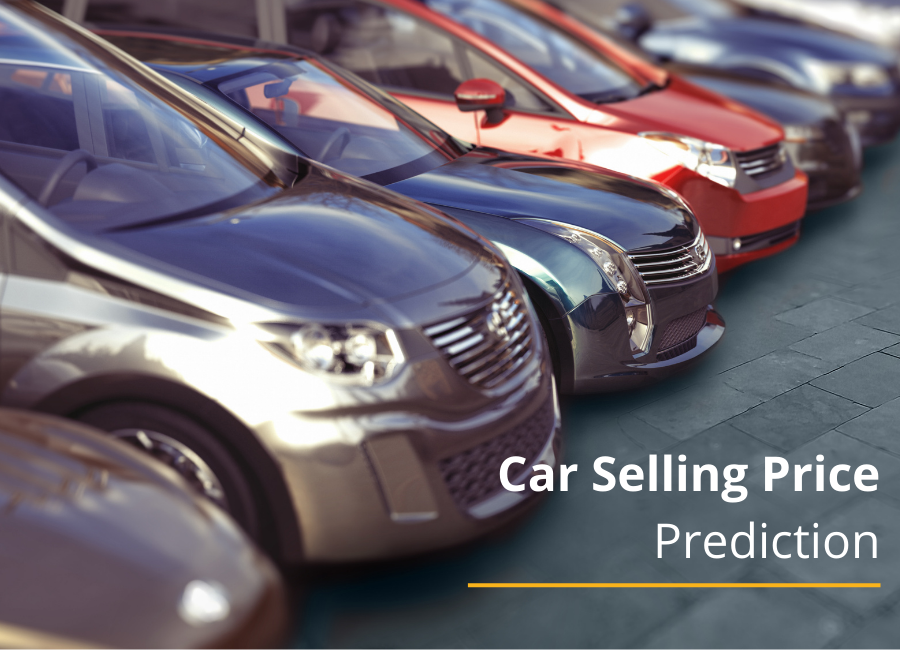

In [ ]:
from IPython.display import Image
from IPython.display import display
display(Image(filename="/content/original.png",height=500,width=900))

In [ ]:
# import necasery laibares
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

In [ ]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
# columns count and names
print ( "columns_count :", df.shape[1])
print ( "row_count :", df.shape[0])
print ("names: ","\n",df.columns)

columns_count : 26
row_count : 205
names:  
 Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
# information about the total number of rows, the number of non-null values in each column, and the data type of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# generate a statistical summary of the DataFrame
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# show the count of missing values in each column of the DataFrame
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
# drop unnececcery columns
df.drop(['car_ID','CarName'],axis=1,inplace=True)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
Axes(0.125,0.11;0.775x0.77)


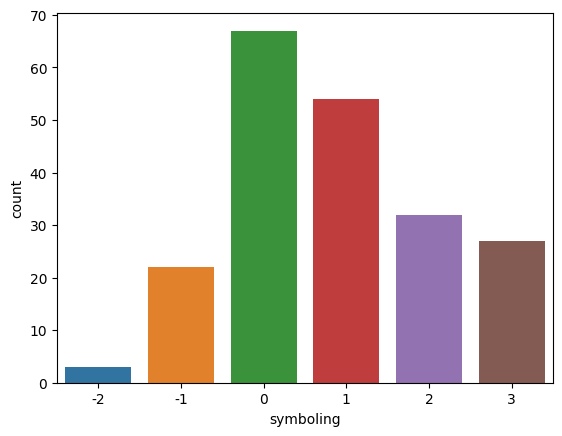

In [ ]:
print(df['symboling'].value_counts())
print(sns.countplot(x=df['symboling'],data=df))

In [ ]:
# preprocessing data(cleaning and organising)
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [ ]:
df['fueltype']=lb.fit_transform(df['fueltype'])
df['aspiration']=lb.fit_transform(df['aspiration'])
df['doornumber']=lb.fit_transform(df['doornumber'])
df['carbody']=lb.fit_transform(df['carbody'])
df['drivewheel']=lb.fit_transform(df['drivewheel'])
df['enginelocation']=lb.fit_transform(df['enginelocation'])
df['enginetype']=lb.fit_transform(df['enginetype'])
df['cylindernumber']=lb.fit_transform(df['cylindernumber'])
df['fuelsystem']=lb.fit_transform(df['fuelsystem'])

In [ ]:
df.dtypes

symboling             int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
enginelocation        int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
# This code extracts the feature variables and target variable
# input data/feature varible
x=df.iloc[:,:-1]
x

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,3,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,2,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,1,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,2,141,5,3.78,3.15,9.5,114,5400,23,28
201,-1,1,1,0,3,2,0,109.1,188.8,68.8,...,2,141,5,3.78,3.15,8.7,160,5300,19,25
202,-1,1,0,0,3,2,0,109.1,188.8,68.9,...,3,173,5,3.58,2.87,8.8,134,5500,18,23
203,-1,0,1,0,3,2,0,109.1,188.8,68.9,...,3,145,3,3.01,3.40,23.0,106,4800,26,27


In [ ]:
# output data/target variable
y=df['price']
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [ ]:
# split the feature variables (x) and target variable (y) into training and testing sets.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
124,3,1,1,1,2,2,0,95.9,173.2,66.3,...,2,156,6,3.59,3.86,7.0,145,5000,19,24
181,-1,1,0,0,4,2,0,104.5,187.8,66.5,...,3,161,5,3.27,3.35,9.2,156,5200,19,24
154,0,1,0,0,4,0,0,95.7,169.7,63.6,...,2,92,1,3.05,3.03,9.0,62,4800,27,32
53,1,1,0,0,3,1,0,93.1,166.8,64.2,...,2,91,1,3.03,3.15,9.0,68,5000,31,38
94,1,1,0,1,3,1,0,94.5,165.3,63.8,...,2,97,1,3.15,3.29,9.4,69,5200,31,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2,1,0,0,3,1,0,99.1,186.6,66.5,...,2,121,5,3.54,3.07,9.3,110,5250,21,28
137,2,1,1,0,3,1,0,99.1,186.6,66.5,...,2,121,5,3.54,3.07,9.0,160,5500,19,26
72,3,1,0,1,0,2,0,96.6,180.3,70.5,...,0,234,5,3.46,3.10,8.3,155,4750,16,18
140,2,1,0,1,2,0,0,93.3,157.3,63.8,...,2,108,1,3.62,2.64,8.7,73,4400,26,31


In [ ]:
x_test

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
78,2,1,0,1,2,1,0,93.7,157.3,64.4,...,2,92,1,2.97,3.230,9.4,68,5500,31,38
97,1,1,0,0,4,1,0,94.5,170.2,63.8,...,2,97,1,3.15,3.290,9.4,69,5200,31,37
151,1,1,0,1,2,1,0,95.7,158.7,63.6,...,2,92,1,3.05,3.030,9.0,62,4800,31,38
44,1,1,0,1,3,1,0,94.5,155.9,63.6,...,2,90,1,3.03,3.110,9.6,70,5400,38,43
40,0,1,0,0,3,1,0,96.5,175.4,62.5,...,2,110,0,3.15,3.580,9.0,86,5800,27,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,0,1,0,0,3,1,0,96.5,175.4,65.2,...,2,110,0,3.15,3.580,9.0,86,5800,27,33
110,0,0,1,0,4,2,0,114.2,198.9,68.4,...,2,152,3,3.70,3.520,21.0,95,4150,25,25
164,1,1,0,1,2,2,0,94.5,168.7,64.0,...,2,98,1,3.19,3.030,9.0,70,4800,29,34
56,3,1,0,1,2,2,0,95.3,169.0,65.7,...,6,70,2,3.33,3.255,9.4,101,6000,17,23


In [ ]:
y_train

124    12764.0
181    15750.0
154     7898.0
53      6695.0
94      7299.0
        ...   
133    12170.0
137    18620.0
72     35056.0
140     7603.0
37      7895.0
Name: price, Length: 143, dtype: float64

In [ ]:
y_test

78      6669.0
97      7999.0
151     6338.0
44      8916.5
40     10295.0
        ...   
39      8845.0
110    13860.0
164     8238.0
56     11845.0
176    10898.0
Name: price, Length: 62, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([ 7686.58655534,  5381.261409  ,  6677.25094077,  4821.9505567 ,
        8224.33405998, 26452.14486875,  7396.97416076, -2404.73452059,
        8093.14594369, 11095.93479009, 15401.59288258, 15193.68961677,
       15414.67987012, 10300.45314496, 14773.72088239, 13580.10067218,
        8483.70761608,  9098.25820738, 13769.39307214,  9235.7428719 ,
        8703.16400247,  8221.80073362, 12479.25234373,  8136.69355338,
       12542.03991107,  9132.84767988, 14658.69697728,  9606.87036411,
        8023.36441248,  8976.87822781,  6629.63390594, 11450.32151051,
       23610.35386296,  9634.41699578, 19530.69783005,  8130.44378431,
        7711.12264182, 29886.67494424,  9506.30057428, 19278.22820992,
        7420.18539651, 21428.40532081,  5237.7349912 ,  9079.63447305,
        9905.37120436,  5900.41597033, 41200.37524863,  6436.46565599,
       20153.02276226, 19641.91374362, 26275.0001551 , 16488.69368148,
       17726.40493026,  7396.31105378, 10262.25515995,  5583.29553777,
      

In [ ]:
df1=pd.DataFrame({"Actual_value":y_test,"pedicted_value":y_pred,"diffarance":y_test-y_pred})
df1

,Actual_value,pedicted_value,diffarance
78,6669.0,7686.586555,-1017.586555
97,7999.0,5381.261409,2617.738591
151,6338.0,6677.250941,-339.250941
44,8916.5,4821.950557,4094.549443
40,10295.0,8224.334060,2070.665940
...,...,...,...
39,8845.0,10303.998520,-1458.998520
110,13860.0,19243.260404,-5383.260404
164,8238.0,7466.643358,771.356642
56,11845.0,8260.163101,3584.836899


In [ ]:
# MAE (mean absolute error)
from sklearn.metrics import mean_absolute_error
print("MAE is :",mean_absolute_error(y_test,y_pred))

MAE is : 2393.719964446148


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print("percentage_error is :",mean_absolute_percentage_error(y_test,y_pred))

percentage_error is : 0.209086689461869


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE is :",mean_squared_error(y_test,y_pred))
ae=mean_squared_error(y_test,y_pred)

MSE is : 12265523.291049052


In [ ]:
print("Root mean squared error :",np.sqrt(ae))

Root mean squared error : 3502.216910907868


In [ ]:
from sklearn.metrics import r2_score
print("r2_score :",r2_score(y_test,y_pred))

r2_score : 0.7968295950296658


VISUALIZATION


 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
Axes(0.125,0.11;0.775x0.77)


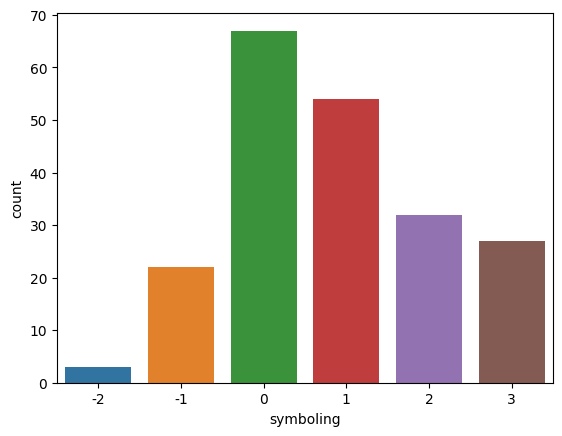

In [ ]:
print(df['symboling'].value_counts())
print(sns.countplot(x=df['symboling'],data=df))

Text(0.5, 1.0, 'fueltype graph')

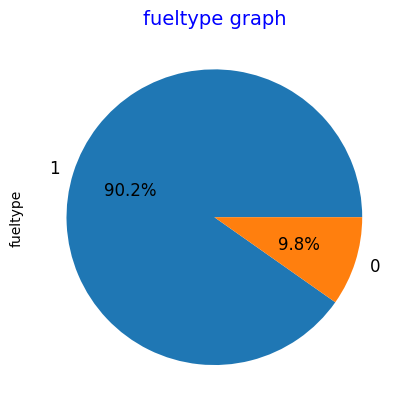

In [ ]:
constaction=df['fueltype'].value_counts()
constaction.plot(kind='pie',fontsize=12,autopct='%1.1f%%')
plt.title('fueltype graph',color='blue',fontsize=14)

Text(0.5, 1.0, 'aspiration graph')

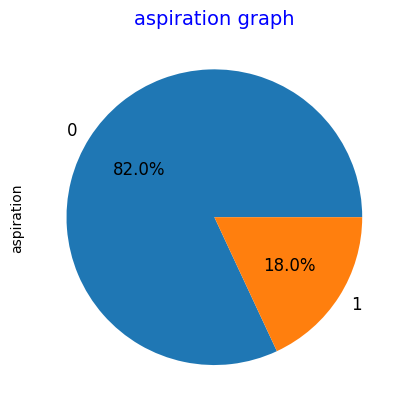

In [ ]:
constaction=df['aspiration'].value_counts()
constaction.plot(kind='pie',fontsize=12,autopct='%1.1f%%')
plt.title('aspiration graph',color='blue',fontsize=14)

Text(0.5, 1.0, 'doornumber graph')

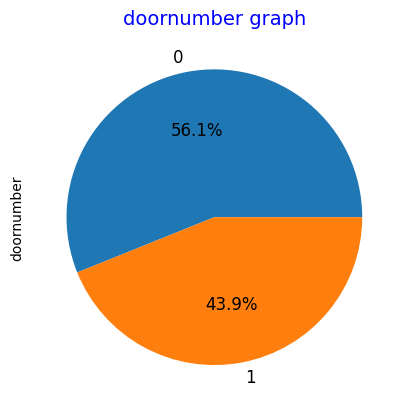

In [ ]:
constaction=df['doornumber'].value_counts()
constaction.plot(kind='pie',fontsize=12,autopct='%1.1f%%')
plt.title('doornumber graph',color='blue',fontsize=14)

3    96
2    70
4    25
1     8
0     6
Name: carbody, dtype: int64
Axes(0.125,0.11;0.775x0.77)


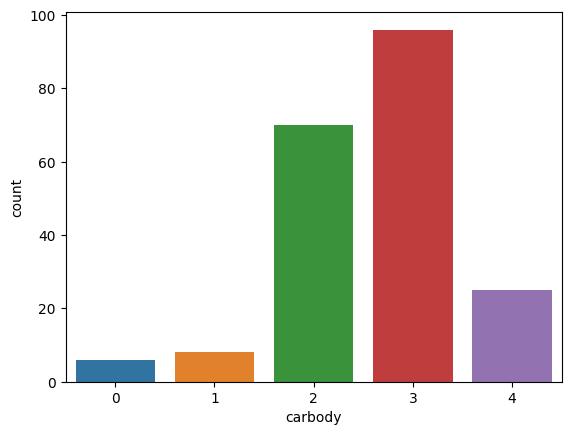

In [ ]:
print(df['carbody'].value_counts())
print(sns.countplot(x=df['carbody'],data=df))

Text(0.5, 1.0, 'drivewheel graph')

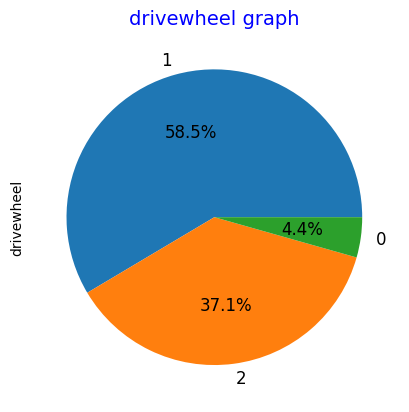

In [ ]:
constaction=df['drivewheel'].value_counts()
constaction.plot(kind='pie',fontsize=12,autopct='%1.1f%%')
plt.title('drivewheel graph',color='blue',fontsize=14)

Text(0.5, 1.0, 'enginelocation graph')

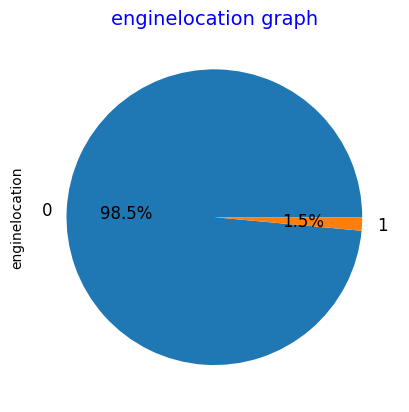

In [ ]:
constaction=df['enginelocation'].value_counts()
constaction.plot(kind='pie',fontsize=12,autopct='%1.1f%%')
plt.title('enginelocation graph',color='blue',fontsize=14)

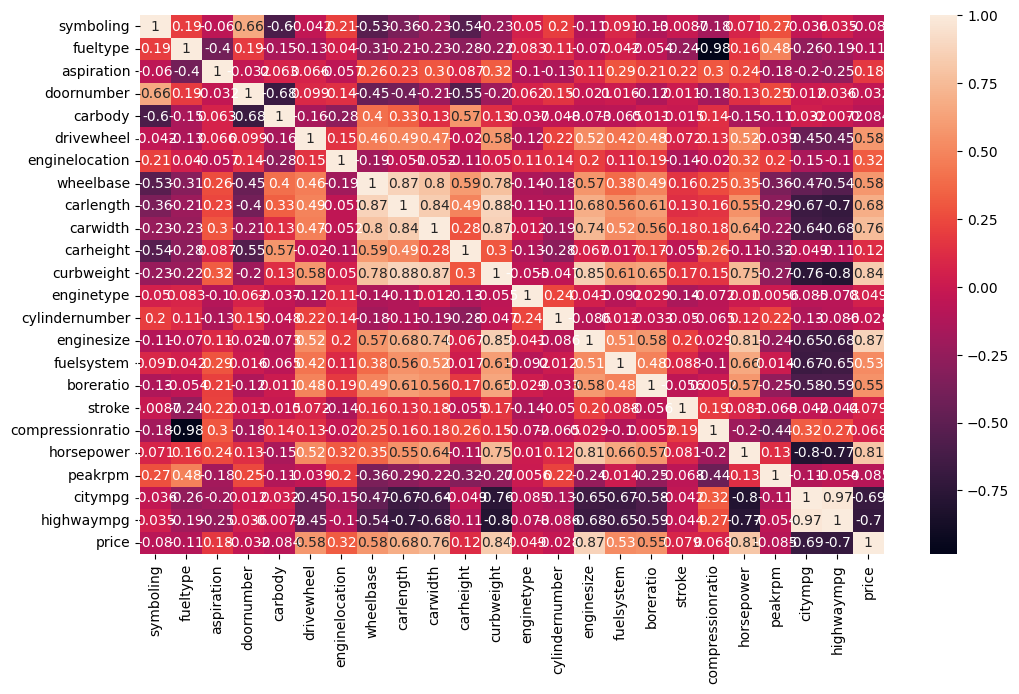

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)
plt.show()